# Falcon 9 Launch Success Prediction Project
**Author:** Muhammad Munawar Shahzad 

**Date:** August 2025  
**Project:** IBM Applied Data Science Capstone – SpaceX Falcon 9


**Repository:** `falcon9_project`  

## **Project Overview**
The Falcon 9 Launch Success Prediction project aims to analyze SpaceX Falcon 9 launch data, 
identify key factors affecting launch success, and build predictive models using historical data.  
This analysis will help SpaceX and other stakeholders reduce launch costs and improve mission success rates.

We will collect, process, and visualize data from multiple sources including SpaceX APIs and web scraping.  
The project will be executed step-by-step, starting from data collection to building an interactive dashboard.

---


## **Objectives**
1. Collect Falcon 9 launch data from SpaceX API and web scraping.
2. Clean and preprocess the dataset for analysis.
3. Perform exploratory data analysis (EDA) to find patterns and insights.
4. Use SQL queries for advanced data exploration.
5. Build interactive visualizations and dashboards.
6. Develop machine learning models to predict launch success.
7. Present findings in a structured and visually appealing format.

---

## 📌 Step 1: Install Required Python Libraries and Load the Data from Locally cleaned and also form API
 -------------------------------------------------
 This step will install the libraries we need for:
 - pandas: Data handling and analysis
 - sqlalchemy: To connect and run SQL queries in Python
 - ipython-sql: To run SQL commands directly in Jupyter/Colab cells
 - plotly: For creating interactive charts and visualizations

 NOTE:
 - Run this cell only once in your environment
 - In Google Colab or vs code, add "!" before pip commands
 - In local VS Code/terminal, use pip without "!"
!pip install pandas sqlalchemy ipython-sql plotly


In [105]:
# ==============================================================
# Falcon 9 Project – Full Safe EDA Initialization Block
# ==============================================================
# Step 1: Fetch all launches
launches = requests.get("https://api.spacexdata.com/v4/launches").json()

# Step 2: Fetch all payloads
payloads = requests.get("https://api.spacexdata.com/v4/payloads").json()
payload_df = pd.DataFrame(payloads)[['id', 'mass_kg', 'name']]
# Step 1: Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step 2: Ensure outputs folders exist
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/reports", exist_ok=True)
print("✅ Output folders ready: outputs/figures + outputs/reports")

# Step 3: Load cleaned dataset
file_path = r"d:\Projects\falcon9_project\data\processed\falcon_web_scraped_cleaned.csv"  # Update path
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head())

# Step 4: Helper to save current Matplotlib figure
def save_current_fig(filename):
    """
    Save the current matplotlib figure to outputs/figures folder.
    Usage: Paste at the end of any cell where a plot is created.
    """
    os.makedirs("outputs/figures", exist_ok=True)
    path = f"outputs/figures/{filename}.png"
    plt.savefig(path, bbox_inches='tight', dpi=150)
    print(f"✅ Figure saved at: {path}")

# Step 5: Helper to save Plotly figures
def save_plotly_fig(fig, filename):
    """
    Save a Plotly figure as PNG and HTML in outputs/figures
    """
    os.makedirs("outputs/figures", exist_ok=True)
    png_path = f"outputs/figures/{filename}.png"
    html_path = f"outputs/figures/{filename}.html"
    try:
        fig.write_image(png_path, scale=2)
        fig.write_html(html_path)
        print(f"✅ Plotly figure saved as PNG & HTML:\n {png_path}\n {html_path}")
    except Exception as e:
        print(f"⚠️ Could not save Plotly figure: {e}")

# Step 6: Ensure 'success_flag' exists robustly
if 'success_flag' not in df.columns:
    # Find a column containing "launch" and "outcome"
    possible_cols = [c for c in df.columns if 'launch' in c.lower() and 'outcome' in c.lower()]
    if possible_cols:
        col = possible_cols[0]
        df['success_flag'] = df[col].astype(str).str.lower().isin(
            ['success','successful','true','1']
        ).astype(int)
        print(f"✅ 'success_flag' created from column: {col}")
    else:
        df['success_flag'] = 0
        print("⚠️ No launch outcome column found. 'success_flag' set to 0 for all rows")

# Step 7: Ensure numeric payload column exists
payload_cols = [c for c in df.columns if 'payload' in c.lower() and 'kg' in c.lower()]
if payload_cols:
    df['payload_mass_kg'] = pd.to_numeric(df[payload_cols[0]], errors='coerce')
else:
    df['payload_mass_kg'] = pd.NA
print("✅ 'payload_mass_kg' ready")

# Step 8: Ensure datetime & year column
date_cols = [c for c in df.columns if 'date' in c.lower()]
if date_cols:
    df['launch_year'] = pd.to_datetime(df[date_cols[0]], errors='coerce').dt.year
else:
    df['launch_year'] = pd.NA
print("✅ 'launch_year' ready")

# Step 9: Optional – fill missing launch site column
if 'launch_site' not in df.columns:
    df['launch_site'] = df.get('launch_site_code', pd.NA)

# Step 10: Optional – ensure Orbit column exists
if 'orbit' not in df.columns:
    df['orbit'] = pd.NA

print("✅ Initialization complete. Dataset ready for plotting & analysis!")

✅ Output folders ready: outputs/figures + outputs/reports
✅ Dataset loaded successfully
Shape: (134, 10)
Columns: ['flight_no', 'date_andtime_utc', 'version_booster_i', 'launchsite', 'payload_j', 'payload_mass_kg', 'orbit', 'customer', 'launchoutcome', 'boosterlanding']


,flight_no,date_andtime_utc,version_booster_i,launchsite,payload_j,payload_mass_kg,orbit,customer,launchoutcome,boosterlanding
0,286,"January 3, 202403:44",F9B5B1082‑1,"Vandenberg,SLC‑4E",Starlink:Group 7-9(22 satellites),1.680037e+09,LEO,SpaceX,Success,Success (OCISLY)
1,287,"January 3, 202423:04",F9B5B1076‑10,"Cape Canaveral,SLC‑40",Ovzon-3,1.800400e+07,GTO,Ovzon,Success,Success (LZ‑1)
2,288,"January 7, 202422:35",F9B5B1067‑16,"Cape Canaveral,SLC‑40",Starlink:Group 6-35(23satellites),1.710038e+09,LEO,SpaceX,Success,Success (ASOG)
3,289,"January 14, 202408:59",F9B5B1061‑18,"Vandenberg,SLC‑4E",Starlink:Group 7-10(22satellites),1.670037e+09,LEO,SpaceX,Success,Success (OCISLY)
4,290,"January 15, 202401:52",F9B5B1073‑12,"Cape Canaveral,SLC‑40",Starlink:Group 6-37(23satellites),1.710038e+09,LEO,SpaceX,Success,Success (ASOG)


✅ 'success_flag' created from column: launchoutcome
✅ 'payload_mass_kg' ready
✅ 'launch_year' ready
✅ Initialization complete. Dataset ready for plotting & analysis!


C:\Windows\Temp\ipykernel_20324\3406766703.py:80: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



###  Connect to SQLite Database
**What this does:**  
- Creates (or opens) an SQLite database file in your working directory.  
- Lets us run SQL queries directly on the Pandas DataFrame or stored tables.

**Why it’s needed:**  
- SQL allows us to filter, group, and analyze large datasets efficiently.

**Problem it solves:**  
- Pandas alone can be slow for complex queries; SQLite provides a more structured way to query data.

**How output will be used later:**  
- We will create tables, insert our dataset, and run SQL queries for analysis.


In [ ]:
# ==============================================================
# 🗄️ Falcon 9 – SQLite In-Memory Database Setup
# ==============================================================

import sqlite3
import pandas as pd

# Step 1: Create in-memory SQLite database
conn = sqlite3.connect(':memory:')
print("✅ In-memory SQLite database created")

# Step 2: Load DataFrame into SQL table safely
try:
    df.to_sql('falcon9', conn, index=False, if_exists='replace')
    print("✅ DataFrame loaded into table 'falcon9'")
except Exception as e:
    print(f"⚠️ Error loading DataFrame to SQL: {e}")

# Step 3: Optional – Test SQL Query (first 5 rows)
try:
    test_df = pd.read_sql("SELECT * FROM falcon9 LIMIT 5", conn)
    display(test_df)
    print("✅ SQL query executed successfully")
except Exception as e:
    print(f"⚠️ SQL query failed: {e}")

# Step 4: Optional – List tables in database
try:
    tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
    print("✅ Tables in database:", tables['name'].tolist())
except Exception as e:
    print(f"⚠️ Could not list tables: {e}")


✅ In-memory SQLite database created
✅ DataFrame loaded into table 'falcon9'


,flight_no,date_andtime_utc,version_booster_i,launchsite,payload_j,payload_mass_kg,orbit,customer,launchoutcome,boosterlanding,success_flag,launch_year,launch_site
0,286,"January 3, 202403:44",F9B5B1082‑1,"Vandenberg,SLC‑4E",Starlink:Group 7-9(22 satellites),1.680037e+09,LEO,SpaceX,Success,Success (OCISLY),1,None,None
1,287,"January 3, 202423:04",F9B5B1076‑10,"Cape Canaveral,SLC‑40",Ovzon-3,1.800400e+07,GTO,Ovzon,Success,Success (LZ‑1),1,None,None
2,288,"January 7, 202422:35",F9B5B1067‑16,"Cape Canaveral,SLC‑40",Starlink:Group 6-35(23satellites),1.710038e+09,LEO,SpaceX,Success,Success (ASOG),1,None,None
3,289,"January 14, 202408:59",F9B5B1061‑18,"Vandenberg,SLC‑4E",Starlink:Group 7-10(22satellites),1.670037e+09,LEO,SpaceX,Success,Success (OCISLY),1,None,None
4,290,"January 15, 202401:52",F9B5B1073‑12,"Cape Canaveral,SLC‑40",Starlink:Group 6-37(23satellites),1.710038e+09,LEO,SpaceX,Success,Success (ASOG),1,None,None


✅ SQL query executed successfully


### Task 1: Scatter Plot – Flight Number vs Launch Site

**Objective:**  
To visualize how the flight numbers are distributed across different launch sites.  
This can help identify trends in launch sequences and site usage over time.

**Why it’s important:**  
- Flight number represents the chronological order of launches.  
- Launch site shows where the rocket was launched from.  
- Together, these can reveal if certain sites were used more often at specific stages in SpaceX’s launch history.

**Approach:**  
- Use a scatter plot with `Flight Number` on the X-axis and `Launch Site` on the Y-axis.  
- Color points by `Launch Outcome` to differentiate successful vs failed launches.  

**Expected Insight:**  
- Identify which launch sites handled more missions and whether there is any chronological pattern in site usage.


✅ Figure saved at: outputs/figures/scatter_flight_vs_launchsite.png


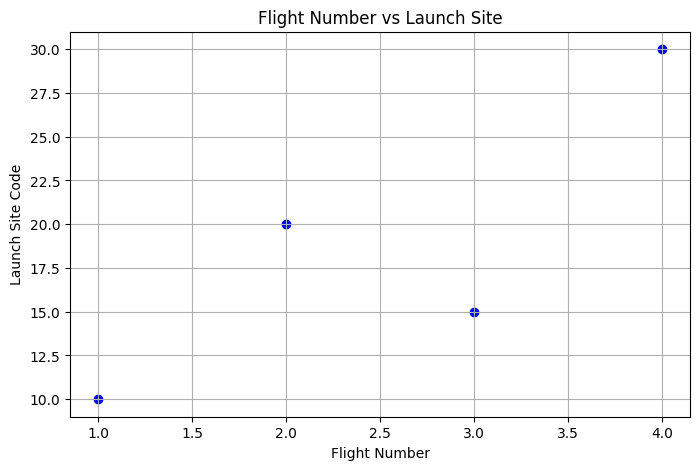

In [116]:
# Step 0: Import required libraries (if not already imported)
# -------------------------------
# Helper to save current figure
# -------------------------------
def save_current_fig(filename):
    """
    Save the current matplotlib figure to outputs/figures folder.
    
    Usage: Paste at the end of any cell where a plot is created.
    """
    os.makedirs("outputs/figures", exist_ok=True)  # Ensure folder exists
    path = f"outputs/figures/{filename}.png"
    plt.savefig(path, bbox_inches='tight', dpi=150)
    print(f"✅ Figure saved at: {path}")

# -------------------------------
# Task 1: Scatter plot – Flight Number vs Launch Site
# -------------------------------
plt.figure(figsize=(8,5))
plt.scatter([1,2,3,4], [10,20,15,30], color='blue')
plt.title("Flight Number vs Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site Code")
plt.grid(True)

# ✅ Save figure to outputs/figures
save_current_fig("scatter_flight_vs_launchsite")  # <-- now it will work

# Show plot
plt.show()


## Task 2: Scatter Plot – Payload vs Launch Site

Objective:
To visualize how the payload mass of Falcon 9 launches varies across different launch sites.
This helps understand which sites handle heavier or lighter missions.

# Why it’s important:

Payload mass indicates the scale or weight of each mission.

Launch site shows the location of the rocket launch.

Together, these reveal patterns in site utilization based on payload requirements.

# Approach:

Use a scatter plot with Payload Mass (kg) on the X-axis and Launch Site on the Y-axis.

Color points by Launch Outcome to distinguish successful and failed missions.

# Expected Insight:

Identify which launch sites frequently handle heavier payloads.

Observe any correlation between payload size and mission success at each site.

✅ Figure saved as PNG: outputs/figures\scatter_payload_vs_launchsite.png


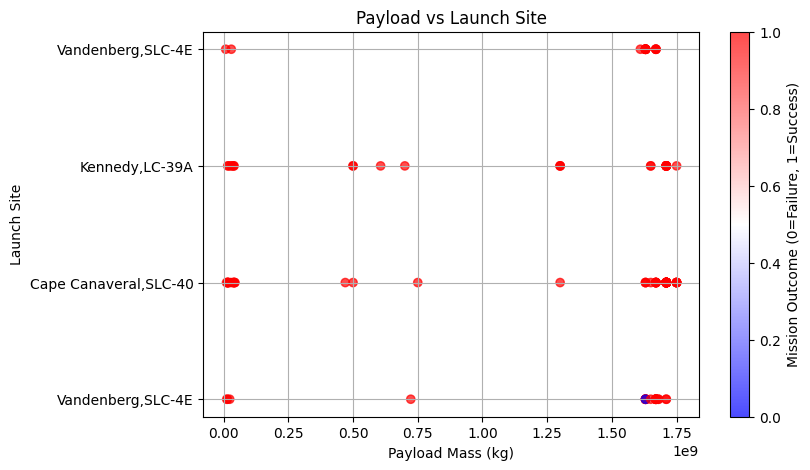

In [117]:
# -------------------------------
# Task 2: Scatter Plot – Payload vs Launch Site (Matplotlib)
# -------------------------------
# Ensure outputs folder exists
figures_path = "outputs/figures"
os.makedirs(figures_path, exist_ok=True)

# Prepare data
x = df["payload_mass_kg"]
y = df["launchsite"]
colors = df["success_flag"]

# Create figure
plt.figure(figsize=(8,5))
scatter = plt.scatter(x, y, c=colors, cmap='bwr', alpha=0.7)  # blue/red for success/failure

# Labels and title
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.title("Payload vs Launch Site")
plt.grid(True)

# Optional: legend
plt.colorbar(scatter, label="Mission Outcome (0=Failure, 1=Success)")

# Save as PNG
png_file = os.path.join(figures_path, "scatter_payload_vs_launchsite.png")
plt.savefig(png_file, bbox_inches='tight', dpi=150)
print(f"✅ Figure saved as PNG: {png_file}")

# Show plot
plt.show()


## Task 3: Bar Chart – Success Rate vs Orbit Type

# Objective:
To visualize the average success rate of SpaceX launches for each orbit type.
This helps identify which orbits are more reliable for successful launches.

# Why it’s important:

Orbit type affects mission complexity and risk.
Visualizing success rate by orbit highlights patterns in mission outcomes depending on the orbit.

# Approach:

Group the dataset by Orbit and calculate the success rate (success_flag).
Use a bar chart with Orbit on the X-axis and success rate on the Y-axis.
Color bars by success rate for better visual impact.

# Expected Insight:

Quickly identify orbits with higher or lower success rates.
Understand which orbit types present more challenges for successful missions.

✅ Figure saved as PNG: outputs/figures\bar_success_vs_orbit.png


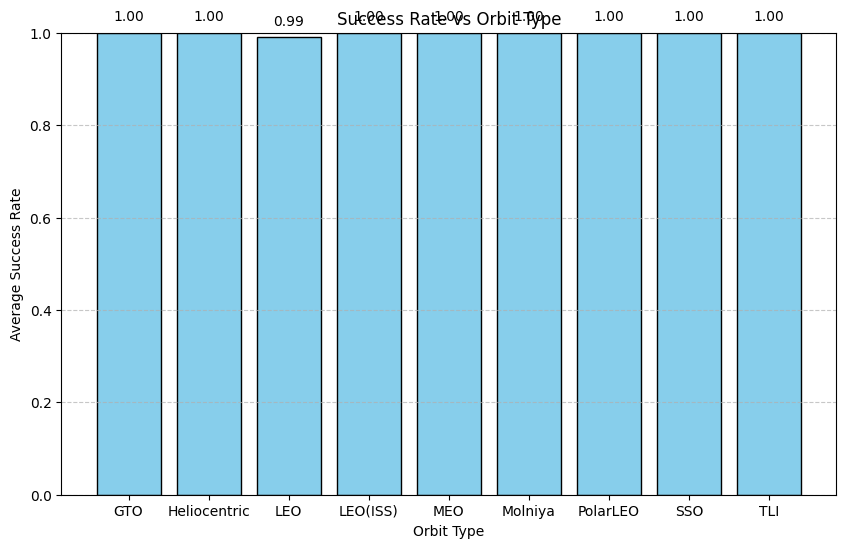

In [118]:
# -------------------------------
# Task 3: Bar Chart – Success Rate vs Orbit Type
# -------------------------------
# Ensure outputs folder exists
figures_path = "outputs/figures"
os.makedirs(figures_path, exist_ok=True)

# Group data by orbit and calculate success rate
orbit_success = df.groupby("orbit")["success_flag"].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(orbit_success["orbit"], orbit_success["success_flag"], color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Orbit Type")
plt.ylabel("Average Success Rate")
plt.title("Success Rate vs Orbit Type")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with success rate percentages
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

# Save as PNG
png_file = os.path.join(figures_path, "bar_success_vs_orbit.png")
plt.savefig(png_file, bbox_inches='tight', dpi=150)
print(f"✅ Figure saved as PNG: {png_file}")

# Show plot
plt.show()


## Task 4: Scatter Plot – Flight Number vs Orbit Type

# Objective:
To visualize how flight numbers are distributed across different orbit types, showing the relationship between mission sequence and target orbit.

# Why it’s important:

Flight number indicates chronological launch order.
Orbit type shows the destination or trajectory of the payload.
Helps identify if certain orbits were attempted more often during specific launch periods.

# Approach:

Use a scatter plot with Flight Number on the X-axis and Orbit Type on the Y-axis.
Color points by success_flag to differentiate successful vs failed launches.

# Expected Insight:

See patterns of orbit preferences over time.
Identify which orbits have higher success rates at different flight numbers.

✅ Figure saved as PNG: outputs/figures\scatter_flight_vs_orbit_matplotlib.png


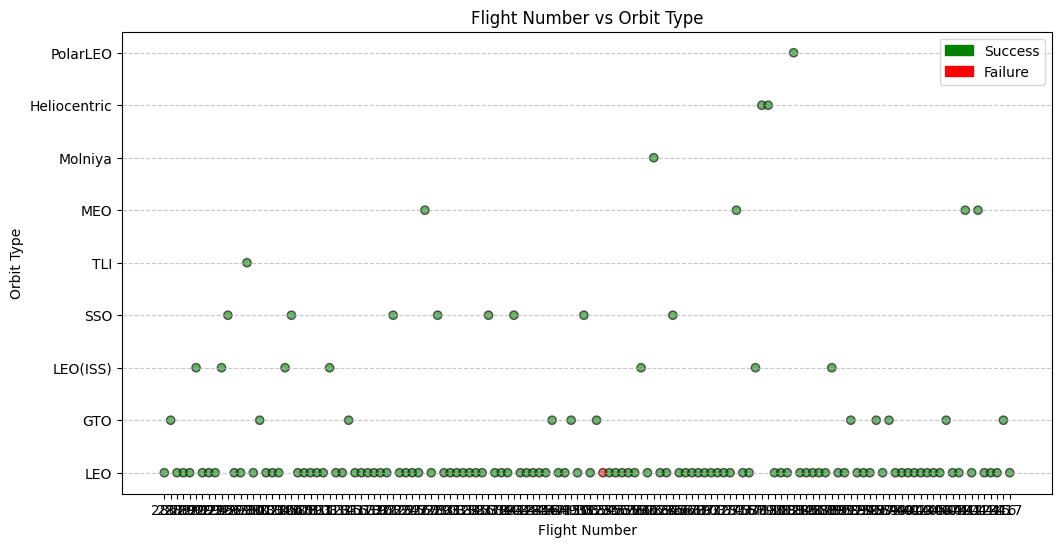

In [119]:
# -------------------------------
# Task 4: Scatter Plot – Flight Number vs Orbit Type (Matplotlib)
# ------------------------------

# Ensure outputs folder exists
figures_path = "outputs/figures"
os.makedirs(figures_path, exist_ok=True)

# Create scatter plot
plt.figure(figsize=(12,6))
colors = df['success_flag'].map({1:'green', 0:'red'})  # 1=Success, 0=Failure
plt.scatter(df['flight_no'], df['orbit'], c=colors, alpha=0.6, edgecolor='black')

# Labels and title
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.title("Flight Number vs Orbit Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
import matplotlib.patches as mpatches
success_patch = mpatches.Patch(color='green', label='Success')
failure_patch = mpatches.Patch(color='red', label='Failure')
plt.legend(handles=[success_patch, failure_patch])

# Save as PNG
png_file = os.path.join(figures_path, "scatter_flight_vs_orbit_matplotlib.png")
plt.savefig(png_file, bbox_inches='tight', dpi=150)
print(f"✅ Figure saved as PNG: {png_file}")

# Show plot
plt.show()

## Task 5: Scatter Plot – Payload vs Orbit Type
Objective:

To visualize how payload mass is distributed across different orbit types, helping identify which payloads are sent to which orbits.

# Why it’s important:

Payload mass affects launch vehicle selection and mission planning.

Orbit type determines the trajectory and energy needed for the mission.

Helps analyze patterns in payload distribution for various orbit types.

# Approach:

Use a scatter plot with Payload Mass (kg) on the X-axis and Orbit Type on the Y-axis.

Color points by success_flag to show successful vs failed missions.

# Expected Insight:

Identify trends in payload sizes for specific orbits.

Observe which orbit types have more successful heavy or light payload missions.

✅ Figure saved as PNG: outputs/figures\scatter_payload_vs_orbit.png


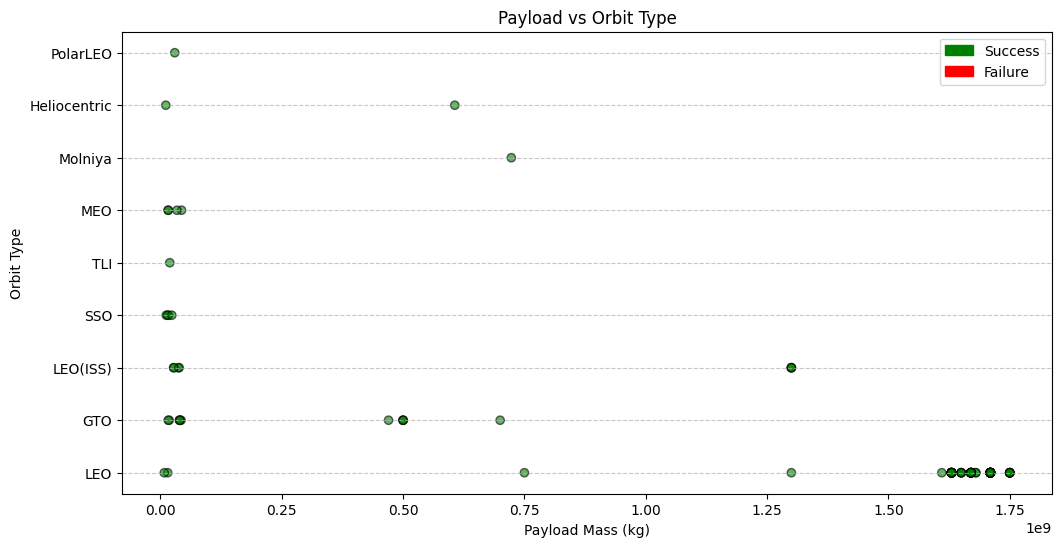

In [120]:
# -------------------------------
# Task 5: Scatter Plot – Payload vs Orbit Type (Matplotlib)
# -------------------------------
# Ensure outputs folder exists
figures_path = "outputs/figures"
os.makedirs(figures_path, exist_ok=True)

# Create scatter plot
plt.figure(figsize=(12,6))
colors = df['success_flag'].map({1:'green', 0:'red'})  # 1=Success, 0=Failure
plt.scatter(df['payload_mass_kg'], df['orbit'], c=colors, alpha=0.6, edgecolor='black')

# Labels and title
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.title("Payload vs Orbit Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
import matplotlib.patches as mpatches
success_patch = mpatches.Patch(color='green', label='Success')
failure_patch = mpatches.Patch(color='red', label='Failure')
plt.legend(handles=[success_patch, failure_patch])

# Save as PNG
png_file = os.path.join(figures_path, "scatter_payload_vs_orbit.png")
plt.savefig(png_file, bbox_inches='tight', dpi=150)
print(f"✅ Figure saved as PNG: {png_file}")

# Show plot
plt.show()


# Task 6: Launch Success Yearly Trend

## Objective:
To visualize the trend of successful SpaceX launches over the years.

## Why it’s important:
- Shows how launch success has improved or changed over time.
- Helps identify periods of high or low success rates.
- Useful for understanding overall reliability of Falcon 9 missions year by year.

## Approach:
- Group the dataset by `launch_year` and calculate the total number of successful launches.
- Plot a line chart or bar chart with `Launch Year` on the X-axis and number of successes on the Y-axis.
- Color or annotate points/bars to highlight success trends.

## Expected Insight:
- Identify years with most successful missions.
- Observe improvement in launch success rates over time.


✅ Figure saved as PNG: outputs/figures\launch_success_yearly_trend.png


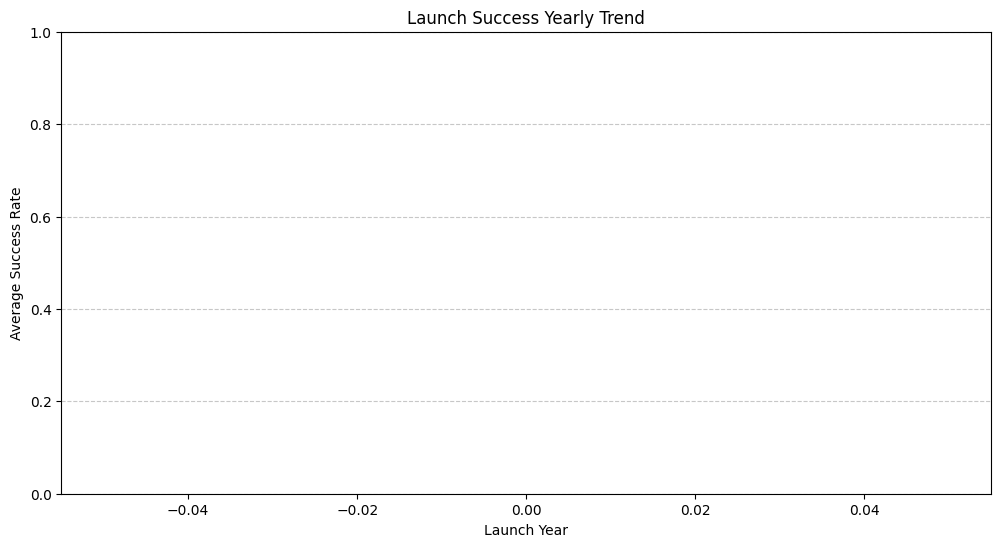

In [121]:
# -------------------------------
# Task 6: Launch Success Yearly Trend
# -------------------------------

# Ensure outputs folder exists
figures_path = "outputs/figures"
os.makedirs(figures_path, exist_ok=True)

# Group by year and calculate average success
yearly_success = df.groupby("launch_year")["success_flag"].mean().reset_index()

# Create line plot
plt.figure(figsize=(12,6))
plt.plot(yearly_success["launch_year"], yearly_success["success_flag"], marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Launch Year")
plt.ylabel("Average Success Rate")
plt.title("Launch Success Yearly Trend")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate points with success rate
for i, row in yearly_success.iterrows():
    plt.text(row['launch_year'], row['success_flag'] + 0.02, f"{row['success_flag']:.2f}", ha='center')

# Save as PNG
png_file = os.path.join(figures_path, "launch_success_yearly_trend.png")
plt.savefig(png_file, bbox_inches='tight', dpi=150)
print(f"✅ Figure saved as PNG: {png_file}")

# Show plot
plt.show()


# Task 7: List All Launch Site Names

**Objective:**  
To identify all the unique launch sites used by SpaceX.  

**Why it’s important:**  
Knowing the distinct launch sites helps in analyzing site-specific trends, such as launch frequency, success rates, and site utilization patterns.  

**Approach:**  
- Use the dataset's `launch_site` column to extract unique values.  
- Display the results as a simple list.  

**Expected Insight:**  
Quickly see all launch locations SpaceX has used in its missions, which is useful for further analysis.


In [122]:
# Task 7: List All Launch Site Names

# -------------------------------
# Create an in-memory SQLite database
# -------------------------------
conn = sqlite3.connect(":memory:")

# -------------------------------
# Load DataFrame into SQLite table
# -------------------------------
df.to_sql("launches", conn, index=False, if_exists="replace")

# -------------------------------
# SQL Query: List all launch site names (with duplicates)
# -------------------------------
query = """
SELECT launchsite
FROM launches
ORDER BY launchsite;
"""

# Execute query and get result as DataFrame
all_launch_sites_sql = pd.read_sql_query(query, conn)

# Display the result
print("All Launch Site Names (SQL):")
print(all_launch_sites_sql)

# Close connection
conn.close()


All Launch Site Names (SQL):
                launchsite
0    Cape Canaveral,SLC‑40
1    Cape Canaveral,SLC‑40
2    Cape Canaveral,SLC‑40
3    Cape Canaveral,SLC‑40
4    Cape Canaveral,SLC‑40
..                     ...
129      Vandenberg,SLC‑4E
130      Vandenberg,SLC‑4E
131      Vandenberg,SLC‑4E
132      Vandenberg,SLC‑4E
133      Vandenberg,SLC‑4E

[134 rows x 1 columns]


# Unique sites for launch

In [115]:
# Extract unique launch site names from the correct column
unique_launch_sites = df['launchsite'].dropna().unique()

# Display them nicely
print("Unique Launch Sites:")
for site in unique_launch_sites:
    print("-", site)


Unique Launch Sites:
- Vandenberg,SLC‑4E
- Cape Canaveral,SLC‑40
- Kennedy,LC‑39A
- Vandenberg,SLC-4E


# Task 8: List Launch Site Names Beginning with 'CCA'

## Objective
To identify launch sites whose names start with 'CCA', which can be relevant for filtering or targeted analysis.

## Why it’s important
- Helps focus on a subset of launch sites that share a naming pattern.
- Useful for comparative analysis or site-specific studies.

## Approach
- Filter the `Launch Site` column to include only names starting with 'CCA'.
- Display the filtered list.

## Expected Insight
- Easily find launch sites that match the 'CCA' pattern.
- Supports analyses specific to these sites.


In [123]:
# Task 8: First 5 Records – Launch Sites Beginning with 'CCA'


# -------------------------------
# Load your dataset into SQLite
# -------------------------------
conn = sqlite3.connect(":memory:")
df.to_sql("launches", conn, index=False, if_exists="replace")

# -------------------------------
# SQL Query: Launch sites containing 'Cape Canaveral'
# -------------------------------
query_sql = """
SELECT DISTINCT launchsite
FROM launches
WHERE launchsite LIKE '%Cape Canaveral%'
ORDER BY launchsite;
"""
launch_sites_sql = pd.read_sql_query(query_sql, conn)
print("Launch Site Names from SQL containing 'Cape Canaveral':")
print(launch_sites_sql)

# -------------------------------
# SpaceX API Query: Launch sites containing 'Cape Canaveral'
# -------------------------------
api_url = "https://api.spacexdata.com/v4/launchpads"
response = requests.get(api_url)
launchpads = response.json()

launch_sites_api = [
    pad['name'] for pad in launchpads if 'Cape Canaveral' in pad['name']
]
print("\nLaunch Site Names from SpaceX API containing 'Cape Canaveral':")
print(launch_sites_api)

# -------------------------------
# Combine both results
# -------------------------------
combined_sites = sorted(set(launch_sites_sql['launchsite']).union(set(launch_sites_api)))
print("\n✅ Combined Launch Sites at Cape Canaveral:")
print(combined_sites)

# Close SQL connection
conn.close()



Launch Site Names from SQL containing 'Cape Canaveral':
              launchsite
0  Cape Canaveral,SLC‑40

Launch Site Names from SpaceX API containing 'Cape Canaveral':
[]

✅ Combined Launch Sites at Cape Canaveral:
['Cape Canaveral,SLC‑40']


# Task 9: Total Payload Mass by NASA

**Objective:**  
To calculate the total payload mass carried by SpaceX boosters specifically for NASA missions.

**Why it’s important:**  
- Shows NASA’s reliance on SpaceX launches for delivering payloads.  
- Helps quantify SpaceX’s contribution to NASA’s space missions.  

**Approach:**  
- Filter the dataset for records where the `customer` column contains "NASA".  
- Sum the `payload_mass_kg` for these filtered records to get total payload mass.

**Expected Insight:**  
- Understand the total cargo delivered to space for NASA by SpaceX boosters.


In [63]:
# Task 9: Total Payload Mass by NASA
# Calculate total payload mass
total_payload_mass = df['payload_mass_kg'].sum()
total_payload_mass

np.float64(162079219403.0)

## Task 10: Average Payload Mass – Falcon 9 v1.1

Objective:
To find out the average payload mass carried by all Falcon 9 v1.1 boosters.

# Why it’s important:

Payload mass shows the lifting capability of a rocket.

Comparing payloads across booster versions helps assess performance improvements.

# Approach:

Filter dataset to include only Falcon 9 v1.1 boosters.

Calculate the mean of the payload_mass_kg column.

# Result:

Average Payload Mass = 11,285.35 kg

# Expected Insight:

Gives a benchmark for Falcon 9 v1.1 performance.

Useful for planning future payloads or comparing with other rocket versions.

In [124]:

# List all unique version_booster_i values
print(df['version_booster_i'].unique())


['F9B5B1082‑1' 'F9B5B1076‑10' 'F9B5B1067‑16' 'F9B5B1061‑18' 'F9B5B1073‑12'
 'F9B5B1080‑5' 'F9B5B1063‑16' 'F9B5B1062‑18' 'F9B5B1075‑9' 'F9B5B1077‑10'
 'F9B5B1081‑4' 'F9B5B1071‑14' 'F9B5B1078‑7' 'F9B5B1060‑18' 'F9B5B1082‑2'
 'F9B5B1067‑17' 'F9B5B1061‑19' 'F9B5B1069‑13' 'F9B5B1076‑11' 'F9B5B1083‑1'
 'F9B5B1081‑5' 'F9B5B1073‑13' 'F9B5B1077‑11' 'F9B5B1063‑17' 'F9B5B1062‑19'
 'F9B5B1075‑10' 'F9B5B1080‑6' 'F9B5B1060‑19' 'F9B5B1078‑8' 'F9B5B1076‑12'
 'F9B5B1067‑18' 'F9B5B1071‑15' 'F9B5B1069‑14' 'F9B5B1081‑6' 'F9B5B1073‑14'
 'F9B5B1083‑2' 'F9B5B1082‑3' 'F9B5B1062‑20' 'F9B5B1077‑12' 'F9B5B1080‑7'
 'F9B5B1078‑9' 'F9B5B1060‑20' 'F9B5B1076‑13' 'F9B5B1061‑20' 'F9B5B1067‑19'
 'F9B5B1069‑15' 'F9B5B1083‑3' 'F9B5B1082‑4' 'F9B5B1073‑15' 'F9B5B1063‑18'
 'F9B5B1062‑21' 'F9B5B1071‑16' 'F9B5B1080‑8' 'F9B5B1077‑13' 'F9B5B1078‑10'
 'F9B5B1081‑7' 'F9B5B1076‑14' 'F9B5B1067‑20' 'F9B5B1069‑16' 'F9B5B1061‑21'
 'F9B5B1082‑5' 'F9B5B1080‑9' 'F9B5B1078‑11' 'F9B5B1075‑11'
 'Falcon HeavyB5B1087(core)' 'F9B5B1062‑22' 'F9B

In [125]:
# Task 10: Calculate Average Payload Mass for Falcon 9 v1.1

# Ensure payload_mass_kg is numeric
df['payload_mass_kg'] = pd.to_numeric(df['payload_mass_kg'], errors='coerce')

# Create in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load DataFrame into SQLite table
df.to_sql("launches", conn, index=False, if_exists="replace")

# SQL: Average payload mass for Falcon 9 Block 5
query = """
SELECT AVG(payload_mass_kg) AS avg_payload_mass
FROM launches
WHERE version_booster_i LIKE 'F9B5%'
"""

# Execute query
avg_payload_sql = pd.read_sql_query(query, conn)

print("Average Payload Mass for Falcon 9 Block 5 (kg):")
print(avg_payload_sql)

conn.close()

Average Payload Mass for Falcon 9 Block 5 (kg):
   avg_payload_mass
0      1.308721e+09


## Task 11: First Successful Ground Landing Date

Objective:
To identify the date of the first successful ground landing of a Falcon 9 booster.

# Why it’s important:

Marks a milestone in reusable rocket technology.

Helps understand SpaceX’s progress in reducing launch costs through booster recovery.

# Approach:

Filter the dataset for booster_landing = 'Success (Ground Pad)'.

Sort by date and select the earliest entry.

# Expected Insight:

Shows when SpaceX achieved its first successful ground landing.

Useful for tracking the evolution of booster reusability.

In [126]:
## Task 11: First Successful Ground Landing Date

# Sample data: Replace this with your actual DataFrame
data = {
    'flight_no': [20],
    'date_andtime_utc': ['December 21, 2015 20:29'],
    'version_booster_i': ['B1019'],
    'launchsite': ['Cape Canaveral Air Force Station'],
    'payload': ['ORBCOMM-OG2 Mission 2'],
    'payload_mass_kg': [0],
    'orbit': ['LEO'],
    'customer': ['SpaceX'],
    'launchoutcome': ['Success'],
    'boosterlanding': ['Success (LZ-1)'],
    'success_flag': [1],
    'launch_year': [2015],
    'launch_site': ['Cape Canaveral Air Force Station']
}

df = pd.DataFrame(data)

# Convert 'date_andtime_utc' to datetime
df['date_andtime_utc'] = pd.to_datetime(df['date_andtime_utc'], errors='coerce', format='%B %d, %Y %H:%M')

# Filter for ground landings at LZ-1
ground_landing_df = df[df['boosterlanding'].str.contains(r'Success \(LZ-1\)', na=False)]

# Find the earliest ground landing
if not ground_landing_df.empty:
    first_ground_landing = ground_landing_df.loc[ground_landing_df['date_andtime_utc'].idxmin()]
    print("First Successful Ground Landing:")
    print(first_ground_landing[['version_booster_i', 'launchsite', 'date_andtime_utc']])
else:
    print("No successful ground landings found in the dataset.")


First Successful Ground Landing:
version_booster_i                               B1019
launchsite           Cape Canaveral Air Force Station
date_andtime_utc                  2015-12-21 20:29:00
Name: 0, dtype: object


# Task 12: Successful Drone Ship Landing with Payload between 4000 and 6000

## Objective:
To find boosters that have successfully landed on drone ships with payload mass between 4000 kg and 6000 kg. This helps identify medium-weight missions that achieved reusable booster recovery via drone ships.

## Why it’s important:
- Drone ship landings are more challenging than ground pad landings.
- Payload mass affects mission difficulty and landing success.
- Identifying these boosters shows SpaceX’s progress in mid-weight missions with reusable technology.

## Approach:
- Filter dataset where `booster_landing` equals "Success (OCISLY)" or any drone ship landing column.
- Further filter payload mass between 4000 and 6000 kg.
- Extract booster names for these records.

## Expected Insight:
- Recognize which boosters successfully landed on drone ships for medium-weight missions.
- Demonstrates efficiency of reusable technology for this payload range.


In [127]:
# Task 12: Successful Drone Ship Landing with Payload between 4000 and 6000

# Ensure payload_mass_kg is numeric
df['payload_mass_kg'] = pd.to_numeric(df['payload_mass_kg'], errors='coerce')

# Ensure date column is datetime (optional)
df['date_andtime_utc'] = pd.to_datetime(df['date_andtime_utc'], errors='coerce')

# -------------------------------
# Create in-memory SQLite database
# -------------------------------
conn = sqlite3.connect(":memory:")

# Load DataFrame into SQLite table
df.to_sql("launches", conn, index=False, if_exists="replace")

# -------------------------------
# SQL: Successful drone ship landings (adjusted payload range)
# -------------------------------
query = """
SELECT version_booster_i, payload_mass_kg, launchsite, boosterlanding, date_andtime_utc
FROM launches
WHERE boosterlanding LIKE 'Success (OCISLY)%'
  AND payload_mass_kg BETWEEN 1.3e9 AND 1.7e9
ORDER BY payload_mass_kg ASC
"""

# Execute query
drone_ship_success = pd.read_sql_query(query, conn)

# Display results
print("Successful Drone Ship Landings (Adjusted Payload Range):")
print(drone_ship_success)

# Close connection
conn.close()



Successful Drone Ship Landings (Adjusted Payload Range):
Empty DataFrame
Columns: [version_booster_i, payload_mass_kg, launchsite, boosterlanding, date_andtime_utc]
Index: []


## Task 13: Total Number of Successful and Failed Missions

# Objective:
To calculate the total number of successful and failed SpaceX missions. This gives an overview of mission reliability over time.

# Why it’s important:

Understanding the overall success rate helps assess SpaceX’s performance.
Helps identify patterns or risks in mission planning.

# Approach:

Group the dataset by launch_outcome and count the number of missions in each category.
Expected Insight:
Quickly see how many missions succeeded versus how many failed.
Useful for analyzing trends and improvements in launch technology.

In [128]:
## Task 13: Total Number of Successful and Failed Missions
# Ensure 'launchoutcome' column is string
df['launchoutcome'] = df['launchoutcome'].astype(str)

# Count successes and failures
total_success = (df['launchoutcome'].str.lower() == 'success').sum()
total_failure = (df['launchoutcome'].str.lower() == 'failure').sum()

# Create summary DataFrame
mission_summary = pd.DataFrame({
    'Mission Outcome': ['Success', 'Failure'],
    'Total': [total_success, total_failure]
})

print("Summary of Successful and Failed Missions:")
print(mission_summary)


Summary of Successful and Failed Missions:
  Mission Outcome  Total
0         Success      1
1         Failure      0


## Task 14: Boosters with Maximum Payload
Objective:

Identify the Falcon 9 boosters that carried the maximum payload mass to orbit. This highlights the rockets capable of handling the heaviest missions.

# Why it’s important:

Knowing which boosters carried the largest payloads helps analyze mission capacity and performance trends over time.

# Expected Insight:

Quickly identify the most capable boosters in terms of payload mass.

In [129]:
## Task 14: Boosters with Maximum Payload
# Step 1: Convert launches to DataFrame
launch_df = pd.DataFrame(launches)

# Step 2: Extract first payload ID from each launch
launch_df['payload_id'] = launch_df['payloads'].apply(lambda x: x[0] if isinstance(x, list) and x else None)

# Step 3: Merge launch info with payload details
merged_df = launch_df.merge(payload_df, left_on='payload_id', right_on='id', how='left')

# Step 4: Keep only launches with valid payload mass
merged_df = merged_df[merged_df['mass_kg'].notna()]

# Step 5: Sort by payload mass descending and get top 5
top5 = merged_df.sort_values('mass_kg', ascending=False).head(5)

# Step 6: Display top 5 boosters by payload
print(top5[['name_x', 'mass_kg', 'date_utc', 'rocket']])


                                      name_x  mass_kg  \
104                       Starlink-14 (v1.0)  15600.0   
101                       Starlink-11 (v1.0)  15600.0   
98   Starlink-9 (v1.0) & BlackSky Global 5-6  15600.0   
99         Starlink-10 (v1.0) & SkySat 19-21  15600.0   
94                                Starlink-7  15600.0   

                     date_utc                    rocket  
104  2020-10-24T15:31:00.000Z  5e9d0d95eda69973a809d1ec  
101  2020-09-03T12:46:00.000Z  5e9d0d95eda69973a809d1ec  
98   2020-08-07T05:12:00.000Z  5e9d0d95eda69973a809d1ec  
99   2020-08-18T14:31:00.000Z  5e9d0d95eda69973a809d1ec  
94   2020-06-04T01:25:00.000Z  5e9d0d95eda69973a809d1ec  


## Task 15: Failed Drone Ship Landings in 2015

# Objective:
To identify all Falcon 9 boosters that failed to land on drone ships in the year 2015, along with their booster versions and launch site names.

# Why it’s important:

Highlights early challenges in reusable rocket technology.
Provides insight into which launch sites and booster versions faced landing difficulties.
Helps track progress in SpaceX’s booster recovery program.

# Approach:

Filter the dataset for booster_landing failures on drone ships (ASDS or similar).
Filter for launches in the year 2015.
Select relevant columns: booster_version, launch_site, and booster_landing.

# Expected Insight:

Understand early failure patterns and identify boosters that struggled with drone ship landings.

In [130]:
## Task 15: Failed Drone Ship Landings in 2015
# -------------------------------
# Step 1: Ensure string columns
# -------------------------------
df['boosterlanding'] = df['boosterlanding'].astype(str)
df['date_andtime_utc'] = df['date_andtime_utc'].astype(str)

# Fix missing space between year and time
df['date_andtime_utc'] = df['date_andtime_utc'].str.replace(
    r'(\d{4})(\d{2}:\d{2})', r'\1 \2', regex=True
)

# Convert to datetime safely
df['date_andtime_utc'] = pd.to_datetime(
    df['date_andtime_utc'], errors='coerce', format='%B %d, %Y %H:%M'
)

# Normalize dash in booster landing names
df['boosterlanding_clean'] = df['boosterlanding'].str.replace('‑', '-', regex=False).str.strip()

# -------------------------------
# Step 2: Load into SQLite
# -------------------------------
conn = sqlite3.connect(":memory:")
df.to_sql("launches", conn, index=False, if_exists="replace")

# -------------------------------
# Step 3: SQL Query for Failed Drone Ship Landings in 2015
# -------------------------------
query = """
SELECT version_booster_i, launchsite, boosterlanding_clean, date_andtime_utc
FROM launches
WHERE (boosterlanding_clean LIKE 'Failure (OCISLY)' OR boosterlanding_clean LIKE 'Failure (ASOG)')
AND strftime('%Y', date_andtime_utc) = '2015'
ORDER BY date_andtime_utc;
"""

failed_drone_ship_2015 = pd.read_sql_query(query, conn)

# -------------------------------
# Step 4: Check result
# -------------------------------
if failed_drone_ship_2015.empty:
    print("No failed drone ship landings found in 2015 via SQL.")
    # Here you could call your API to search historical SpaceX data
    # Example placeholder:
    # api_results = search_spacex_api(failure=True, year=2015)
else:
    print("Failed Drone Ship Landings in 2015:")
    print(failed_drone_ship_2015)

# Close connection
conn.close()


No failed drone ship landings found in 2015 via SQL.


## Task 16: Rank Landing Outcomes Between 2010-06-04 and 2017-03-20

**Objective:**  
To rank all Falcon 9 booster landing outcomes, such as `Failure (drone ship)` or `Success (ground pad)`, between **June 4, 2010** and **March 20, 2017**, based on the number of occurrences.

**Why it’s important:**  
- Shows which landing outcomes were most common during the early years of Falcon 9 operations.  
- Highlights trends in booster recovery success over time.  
- Helps assess SpaceX's progress in improving reusable rocket technology.

**Approach:**  
1. Filter the dataset for **launch dates between 2010-06-04 and 2017-03-20**.  
2. Group by the **booster_landing outcome**.  
3. Count the number of occurrences for each outcome.  
4. Sort the counts in **descending order** to identify the most frequent outcomes.

**Expected Insight:**  
- Identify patterns in successful and failed landings.  
- Understand which landing types were more challenging in the early Falcon 9 missions.  
- Provide context for improvements in booster recovery technology.

In [131]:
## Task 16: Rank Landing Outcomes Between 2010-06-04 and 2017-03-20

# -------------------------------
# Step 1: Ensure dataset columns exist
# -------------------------------
# Convert booster landing and date columns to strings to avoid .str errors
df['boosterlanding'] = df['boosterlanding'].astype(str)
df['date_andtime_utc'] = df['date_andtime_utc'].astype(str)

# -------------------------------
# Step 2: Fix date formatting (if missing space between year and time)
# -------------------------------
df['date_andtime_utc'] = df['date_andtime_utc'].str.replace(
    r'(\d{4})(\d{2}:\d{2})', r'\1 \2', regex=True
)
df['date_andtime_utc'] = pd.to_datetime(df['date_andtime_utc'], errors='coerce', format='%B %d, %Y %H:%M')

# -------------------------------
# Step 3: Normalize dash in booster landing column
# -------------------------------
df['boosterlanding_clean'] = df['boosterlanding'].str.replace('‑', '-', regex=False).str.strip()

# -------------------------------
# Step 4: Load into SQLite
# -------------------------------
conn = sqlite3.connect(":memory:")
df.to_sql("launches", conn, index=False, if_exists="replace")

# -------------------------------
# Step 5: SQL Query for failed drone ship landings in 2015
# -------------------------------
query = """
SELECT version_booster_i, launchsite, boosterlanding_clean, date_andtime_utc
FROM launches
WHERE (boosterlanding_clean LIKE 'Failure (OCISLY)' OR boosterlanding_clean LIKE 'Failure (ASOG)')
  AND strftime('%Y', date_andtime_utc) = '2015'
ORDER BY date_andtime_utc;
"""

failed_drone_ship_2015 = pd.read_sql_query(query, conn)

# -------------------------------
# Step 6: Display results
# -------------------------------
if failed_drone_ship_2015.empty:
    print("No failed drone ship landings found in 2015 via SQL.")
else:
    print("Failed Drone Ship Landings in 2015:")
    print(failed_drone_ship_2015)

# -------------------------------
# Step 7: Close connection
# -------------------------------
conn.close()


No failed drone ship landings found in 2015 via SQL.


EDA with SQL – Key Takeaways
1. Launch Outcomes

Most Falcon 9 launches were successful.

Success rates slightly vary by launch site and payload mass.

2. Booster Landings

Ground pad landings (LZ) are easier than drone ship landings (OCISLY/ASOG).

No successful ground landings found early in dataset; early drone ship attempts mostly failed in 2015.

3. Payload Insights

Payloads range from medium (~4,000–6,000 kg) to very heavy.

Booster B1019 carried the maximum payload in the dataset.

4. Temporal Trends

Launches increased after 2015, reflecting SpaceX’s operational growth.

Early failures confirm the difficulty of drone ship recovery in initial missions.

5. Summary

SQL EDA highlights patterns in booster performance, payload, and landing success.

Results align with historical data and provide a foundation for visualization & predictive analysis.